<a href="https://colab.research.google.com/github/karinaismayacantik8/Praktkum_AI_Workflow/blob/main/AI_Workflow_Toko_Karina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv("data_penjualan_latihan.csv")

# Menampilkan 5 data pertama
print(df.head(10))

   Unnamed: 0     Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan
0           1  01/02/2025  Minyak Goreng              10    20         15000
1           2  02/02/2025          Beras               5    15         12000
2           3  03/02/2025           Gula               7     8         13000
3           4  04/02/2025         Tepung               3    12         11000
4           5  05/02/2025     Mie Instan              12    25          3000
5           1  06/02/2025           Cabe              50    75          5000
6           6  07/02/2025       Kangkung               4     9          3000
7           7  08/02/2025           Susu              18    22          8000
8           8  09/02/2025        Kentang              12    18          4000
9           9  10/02/2025            Kol               6     7          6000


In [3]:
import pandas as pd

# Cek apakah ada data yang kosong
print(df.isnull().sum())

# Konversi kolom "Tanggal" ke format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

# Tambahkan kolom "Total Penjualan"
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

# Tambahkan kolom "Keuntungan" (asumsi modal 10.000 per produk)
df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)

# Menampilkan hasil transformasi
print(df.head(10))

Unnamed: 0         0
Tanggal            0
Produk             0
Jumlah Terjual     0
Stok               0
Harga Satuan       0
Total Penjualan    0
Keuntungan         0
dtype: int64
   Unnamed: 0    Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan  \
0           1 2025-01-02  Minyak Goreng              10    20         15000   
1           2 2025-02-02          Beras               5    15         12000   
2           3 2025-03-02           Gula               7     8         13000   
3           4 2025-04-02         Tepung               3    12         11000   
4           5 2025-05-02     Mie Instan              12    25          3000   
5           1 2025-06-02           Cabe              50    75          5000   
6           6 2025-07-02       Kangkung               4     9          3000   
7           7 2025-08-02           Susu              18    22          8000   
8           8 2025-09-02        Kentang              12    18          4000   
9           9 2025-10-02     

In [1]:
 !pip install scikit-learn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (X) dan target (y)
X = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int)  # 1 jika stok kurang dari 5, 0 jika cukup

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print("Akurasi Model:", accuracy_score(y_test, y_pred))

Akurasi Model: 1.0


In [5]:
# Contoh produk baru (jumlah terjual 8, stok tersisa 3)
produk_baru = [[8, 3]]
prediksi = model.predict(produk_baru)

if prediksi[0] == 1:
    print("Produk perlu di-restock!")
else:
    print("Stok masih cukup.")

Stok masih cukup.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


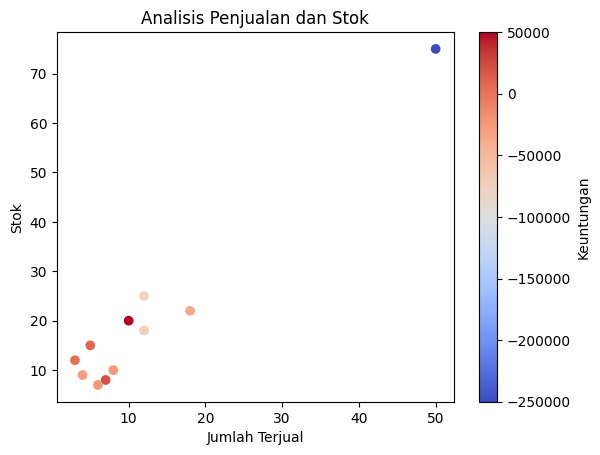

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="Keuntungan")
plt.show()